In [1]:
from IPython.display import Audio, display, Markdown
import matplotlib.pyplot as plt
import sys
sys.path.insert (0, '/home/scola/modules/RythmListener/')
import RythmListener as rl

In [3]:
path2figures = '/home/scola/RECHERCHE/Collab_Lasayah/RythmListener/analyses/figures/'
path2scores = '/home/scola/RECHERCHE/Collab_Lasayah/RythmListener/analyses/scores/'
SAVEFIG = True

In [4]:
path2source = '/home/scola/RECHERCHE/Collab_Lasayah/sources/AUDIO/youtube-dl/extraits/'
filename = 'JS_Bach-Fugue_Cmin.wav'

# import signal
piece = rl.SIGNAL (path2source + filename)

# JS_Bach-Fugue_Cmin

Tempo moyen = 103.36 bpm (stability : 94.6 %)

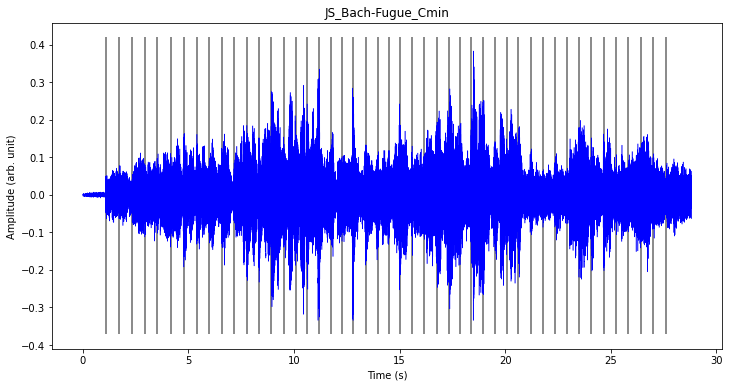

In [9]:
# get track tempo
piece.track_tempo ()
piece.half_tempo ()
piece.shift_beat_frame (shift = 0.5)

# display wave form
fig, ax = plt.subplots (figsize = piece.figure_size)
piece.plotwaveform (ax)
piece.display_tempo (ax)
if SAVEFIG : fig.savefig (path2figures + filename [:-4] + '_WF.png')
    
# add tempo clicks to the original track
piece.burn_clicks ()

display (Markdown ('# ' + filename [:-4]))

Audio(piece.signal, rate=piece.samplerate)

tempo_disp = f'Tempo moyen = {piece.tempo:.2f} bpm (stability : {piece.tempo_stability:.1f} %)'
display (Markdown (tempo_disp))

In [11]:
Audio(piece.signal * 2.5 + piece.clicks, rate = piece.samplerate)

#### Time-frequency analysis and onset detection from power enveloppe

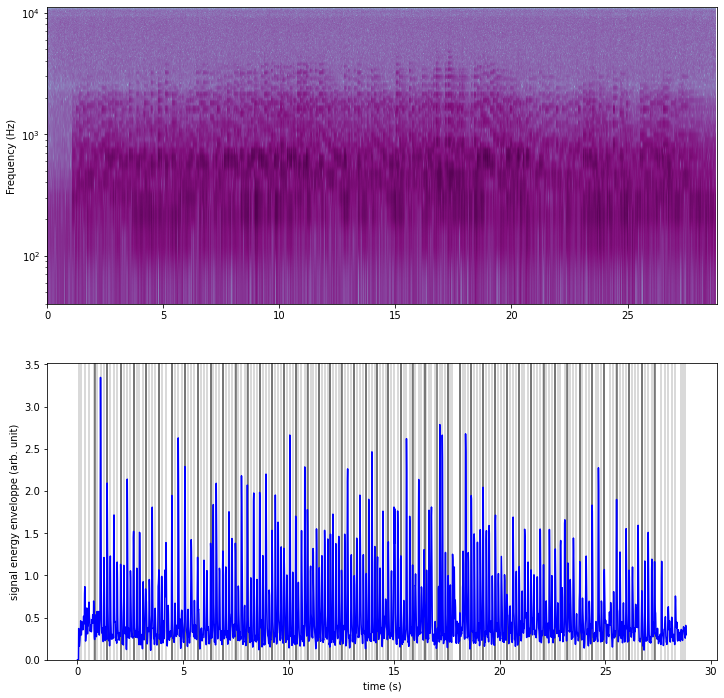

In [6]:
# Time-frequency analysis and onset detection
piece.track_enveloppe ()
piece.track_onsets ()
piece.display_spec_and_onset (figsize = piece.figure_size)
if SAVEFIG : fig.savefig (path2figures + filename [:-4] + '_TF.png')
    
specgram_disp = f'#### Time-frequency analysis and onset detection from power enveloppe'
display (Markdown (specgram_disp))

#### Rhythm chord : onset distribution in time unit

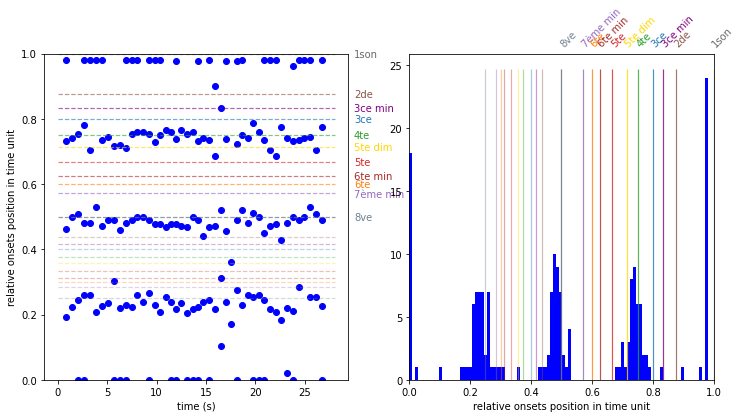

In [7]:
# calculate onset consonnance
piece.calculate_onset_consonnace ()

# display rhythm chords
fig, (ax3, ax4) = plt.subplots (nrows = 1, ncols = 2, figsize = piece.figure_size)
hist_data = piece.display_rhythm_chords (ax3, ax4)
if SAVEFIG : fig.savefig (path2figures + filename [:-4] + '_RC.png')
    
rhythm_chord_disp = f'#### Rhythm chord : onset distribution in time unit'
display (Markdown (rhythm_chord_disp))

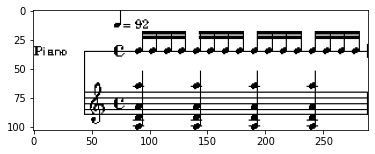

In [7]:
import matplotlib.image as mpimg
score = path2scores + filename [:-4] + '_voicing-1.eps'
img = mpimg.imread (score)
immgplot = plt.imshow (img)
plt.show ()